# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

In [2]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2023860
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data.to_numpy() / 255., mnist.target.to_numpy()

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [4]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([47, 64, 54, 46, 51, 45, 51, 56, 43, 43]))

We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [5]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


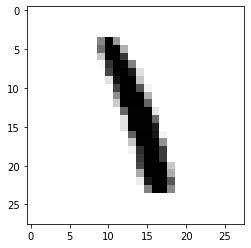

LABEL: 1
INPUT:


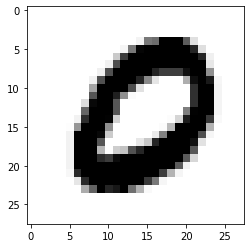

LABEL: 0


In [6]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## TO DO 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

linear_SVM_cv = GridSearchCV(linear_SVM, parameters) # cv default value if None: 5-fold.
linear_SVM_cv.fit(X_train, y_train)

print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(linear_SVM_cv.best_params_)

print("Score with best parameters:")
print(linear_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(linear_SVM_cv.cv_results_['params'])):
    print(linear_SVM_cv.cv_results_['params'][i], " --> ", linear_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
poly2_SVM_cv = GridSearchCV(poly2_SVM, parameters)
poly2_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(poly2_SVM_cv.best_params_)

print("Score with best parameters:")
print(poly2_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(poly2_SVM_cv.cv_results_['params'])):
    print(poly2_SVM_cv.cv_results_['params'][i], " --> ", poly2_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
rbf_SVM_cv = GridSearchCV(rbf_SVM, parameters)
rbf_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(rbf_SVM_cv.best_params_)

print("Score with best parameters:")
print(rbf_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(rbf_SVM_cv.cv_results_['params'])):
    print(rbf_SVM_cv.cv_results_['params'][i], " --> ", rbf_SVM_cv.cv_results_['mean_test_score'][i])


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.852

All scores on the grid:
{'C': 1}  -->  0.852
{'C': 10}  -->  0.852
{'C': 100}  -->  0.852


----------------------


RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.1}
Score with best parameters:
0.866

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.8320000000000001
{'C': 1, 'gamma': 0.1}  -->  0.866
{'C': 1, 'gamma': 1.0}  -->  0.866
{'C': 10, 'gamma': 0.01}  -->  0.8640000000000001
{'C': 10, 'gamma': 0.1}  -->  0.866
{'C': 10, 'gamma': 1.0}  -->  0.866
{'C': 100, 'gamma': 0.01}  -->  0.866
{'C': 100, 'gamma': 0.1}  -->  0.866
{'C': 100, 'gamma': 1.0}  -->  0.866


----------------------


RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.884

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.874
{'C': 1, 'gamma': 0.1}  -->  0.462
{'C': 1, 'gamma': 1.0}  -->  0.128
{'C': 10, 'gamma': 0.

## TO DO 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [8]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=10, kernel='rbf', gamma=0.01)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.104144


## Use logistic regression for comparison

## TO DO 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [9]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=250)
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train, y_train)
test_error = 1. - lr.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)

print("\n\n----------------------\n")




#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(max_iter=250).fit(X_train, y_train) # cv default value if None: 5-fold. 
training_error_cv = 1. - lr_cv.score(X_train, y_train)
test_error_cv = 1. - lr_cv.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.155755


----------------------

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.162777


## TO DO 4 
Compare and comment the results from SVM and logistic regression.

As we can see, the training error of all models we have developed is nearby zero. The test error, instead, is lower in the SVM model. This is because SVM works well with unstructured data like images (that is our study case), while the logistic regression works with alredy identified independent variables.

## TO DO 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

Index of element:  4515
INPUT:


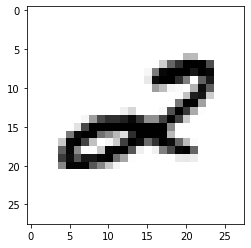

LABEL: 2
Label (wrongly) predicted by 'lr_cv':  4
Label (correctly) predicted by 'best_SVM':  2


In [10]:
# in 'lr_miscl' are stored the index of all misclassified elements of 'X_test', by 'lr_cv'
lr_pred = lr_cv.predict(X_test)
lr_miscl = np.where(y_test != lr_pred)[0]

# in 'SVM_miscl' are stored the index of all misclassified elements of 'X_test', by 'best_SVM'
SVM_pred = best_SVM.predict(X_test)
SVM_miscl = np.where(y_test != SVM_pred)[0]


# here are stored the index of all misclassified element of 'lr_cv' which are correctly classified by 'best_SVM'
# (this is the 'difference' operation between two sets)
lr_misclassified__SVM_correct = np.setdiff1d(lr_miscl, SVM_miscl, assume_unique=True)

# randomly, it is chosen an index for the previous array
randomIndex = np.random.randint(0, high=len(lr_misclassified__SVM_correct), size=1)[0]

# the cell of index 'randomIndex' of the array 'lr_misclassified__SVM_correct'
# is the index of an element of 'X_test' that is misclassified by 'lr_cv',
# but is correctly classified by 'best_SVM'
index_toPlot = lr_misclassified__SVM_correct[randomIndex]


print("Index of element: ", index_toPlot)
plot_digit(X_test, y_test, index_toPlot)
print("Label (wrongly) predicted by 'lr_cv': ", lr_pred[index_toPlot])
print("Label (correctly) predicted by 'best_SVM': ", SVM_pred[index_toPlot])

## More data
Now let's do the same but using 1000 data points for training. 

## TO DO 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

In [11]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts = True)

Labels and frequencies in training dataset: 


(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([ 89, 111, 103,  98,  95, 111, 103, 102,  96,  92]))

### TO DO 1/B

In [12]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model using 5-fold CV 
#and train it using all the training data

linear_SVM_cv = GridSearchCV(linear_SVM, parameters) # cv default value if None: 5-fold.
linear_SVM_cv.fit(X_train, y_train)

print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(linear_SVM_cv.best_params_)

print("Score with best parameters:")
print(linear_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(linear_SVM_cv.cv_results_['params'])):
    print(linear_SVM_cv.cv_results_['params'][i], " --> ", linear_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
poly2_SVM_cv = GridSearchCV(poly2_SVM, parameters)
poly2_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(poly2_SVM_cv.best_params_)

print("Score with best parameters:")
print(poly2_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(poly2_SVM_cv.cv_results_['params'])):
    print(poly2_SVM_cv.cv_results_['params'][i], " --> ", poly2_SVM_cv.cv_results_['mean_test_score'][i])

print("\n\n----------------------\n")




# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
rbf_SVM_cv = GridSearchCV(rbf_SVM, parameters)
rbf_SVM_cv.fit(X_train, y_train)

print('\nRESULTS FOR rbf KERNEL\n')

print("Best parameters set found:")
print(rbf_SVM_cv.best_params_)

print("Score with best parameters:")
print(rbf_SVM_cv.best_score_)

print("\nAll scores on the grid:")
for i in range(len(rbf_SVM_cv.cv_results_['params'])):
    print(rbf_SVM_cv.cv_results_['params'][i], " --> ", rbf_SVM_cv.cv_results_['mean_test_score'][i])


RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.884

All scores on the grid:
{'C': 1}  -->  0.884
{'C': 10}  -->  0.884
{'C': 100}  -->  0.884


----------------------


RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.905

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.885
{'C': 1, 'gamma': 0.1}  -->  0.9049999999999999
{'C': 1, 'gamma': 1.0}  -->  0.9049999999999999
{'C': 10, 'gamma': 0.01}  -->  0.905
{'C': 10, 'gamma': 0.1}  -->  0.9049999999999999
{'C': 10, 'gamma': 1.0}  -->  0.9049999999999999
{'C': 100, 'gamma': 0.01}  -->  0.9049999999999999
{'C': 100, 'gamma': 0.1}  -->  0.9049999999999999
{'C': 100, 'gamma': 1.0}  -->  0.9049999999999999


----------------------


RESULTS FOR rbf KERNEL

Best parameters set found:
{'C': 100, 'gamma': 0.01}
Score with best parameters:
0.914

All scores on the grid:
{'C': 1, 'gamma': 0.01}  -->  0.9019999999999999
{'C': 1, '

### TO DO 2/B

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=10, kernel='rbf', gamma=0.01)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.080812


### TO DO 3/B

In [14]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=300)
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train, y_train)
test_error = 1. - lr.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)

print("\n\n----------------------\n")




#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(max_iter=250).fit(X_train, y_train) # cv default value if None: 5-fold. 
training_error_cv = 1. - lr_cv.score(X_train, y_train)
test_error_cv = 1. - lr_cv.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.130522


----------------------

Best logistic regression training error: 0.006000
Best logistic regression test error: 0.128768


### TO DO 5/B

Index of element:  11777
INPUT:


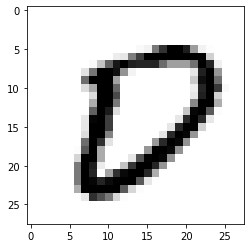

LABEL: 0
Label (wrongly) predicted by 'lr_cv':  5
Label (correctly) predicted by 'best_SVM':  0


In [15]:
# in 'lr_miscl' are stored the index of all misclassified elements of 'X_test', by 'lr_cv'
lr_pred = lr_cv.predict(X_test)
lr_miscl = np.where(y_test != lr_pred)[0]

# in 'SVM_miscl' are stored the index of all misclassified elements of 'X_test', by 'best_SVM'
SVM_pred = best_SVM.predict(X_test)
SVM_miscl = np.where(y_test != SVM_pred)[0]


# here are stored the index of all misclassified element of 'lr_cv' which are correctly classified by 'best_SVM'
# (this is the 'difference' operation between two sets)
lr_misclassified__SVM_correct = np.setdiff1d(lr_miscl, SVM_miscl, assume_unique=True)

# randomly, it is chosen an index for the previous array
randomIndex = np.random.randint(0, high=len(lr_misclassified__SVM_correct), size=1)[0]

# the cell of index 'randomIndex' of the array 'lr_misclassified__SVM_correct'
# is the index of an element of 'X_test' that is misclassified by 'lr_cv',
# but is correctly classified by 'best_SVM'
index_toPlot = lr_misclassified__SVM_correct[randomIndex]


print("Index of element: ", index_toPlot)
plot_digit(X_test, y_test, index_toPlot)
print("Label (wrongly) predicted by 'lr_cv': ", lr_pred[index_toPlot])
print("Label (correctly) predicted by 'best_SVM': ", SVM_pred[index_toPlot])

## TO DO 7
Compare and comment on the differences with the results above.

As expected, the increase in the size of the training set has resulted in greater precision in the classification of the elements.

In fact, the test error has decreased by about 23% both for the model developed with SVM and for the logistic regression.

However, the previous argument remains valid, so that with the help of the SVM model you get better performance than the logistic regression.